***Part 1 :*** *Traitement avec la caractéristique 'area'*

 Nous supposons que 'price' est la colonne cible (ce que nous voulons prédire)
 et que 'area' est la seule caractéristique utilisée

In [1]:
# Importation des bibliothèques nécessaires
import pandas as pd
from sklearn.model_selection import train_test_split  # Pour diviser les données en ensembles d'entraînement et de test
from sklearn.preprocessing import StandardScaler      # Pour normaliser les données
from sklearn.linear_model import LinearRegression     # Pour la régression linéaire
from sklearn.metrics import mean_squared_error        # Pour calculer l'erreur quadratique moyenne (MSE)
import numpy as np               # Pour les opérations sur les tableaux et matrices
import matplotlib.pyplot as plt  # Pour afficher les graphiques

In [2]:
# Charger le fichier CSV dans un DataFrame
df = pd.read_csv('../Housing.csv')

In [3]:
# Afficher les premières lignes du dataset pour inspecter la structure des données
print(df.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


##Partie 1
Nous supposons que 'price' est la colonne cible (ce que nous voulons prédire)

Et que 'area', 'bedrooms', 'bathrooms', et 'stories' sont les caractéristiques (features)


In [4]:
# Étape 1 : Prétraitement des données
# Transformer les données en un tableau numpy
Xdata_area = df[['price', 'area']].to_numpy()

In [5]:
# Étape 2 :
# Question a)- Standardiser les données
# StandardScaler normalise les données en leur attribuant une moyenne de 0 et une variance de 1
scaler_area = StandardScaler()
X_scaled_area = scaler_area.fit_transform(Xdata_area)

In [6]:
# Séparer la cible (colonne 'price') de la caractéristique 'area'
y_scaled_area = X_scaled_area[:, 0]  # La première colonne 'price' est la cible
X_scaled_area = X_scaled_area[:, 1:]  # La seule colonne ici est 'area'

In [7]:
# Étape 3 :
# Question b)- Séparer les données en ensembles d'entraînement et de test
# train_test_split sépare les données en deux parties : une pour l'entraînement et l'autre pour le test
# test_size=0.3 signifie que 30% des données seront utilisées pour le test, et 70% pour l'entraînement
x_train_area, x_test_area, y_train_area, y_test_area = train_test_split(X_scaled_area, y_scaled_area, test_size=0.3, random_state=42)

In [8]:
# Étape 4 :
# Question c)- Entraîner le modèle de régression linéaire
# LinearRegression() crée une instance du modèle de régression linéaire
# model.fit ajuste (ou entraîne) le modèle sur les données d'entraînement
model_area = LinearRegression()
model_area.fit(x_train_area, y_train_area)

LinearRegression()

In [9]:
# Étape 5 :
# Question d)- Faire des prédictions et calculer l'erreur quadratique moyenne (MSE)
# model.predict utilise le modèle entraîné pour prédire les prix des maisons sur l'ensemble de test (x_test)
y_pred_area = model_area.predict(x_test_area)

In [10]:
# Question e)- mean_squared_error calcule l'erreur quadratique moyenne entre les valeurs réelles (y_test) et prédites (y_pred)
mse_area = mean_squared_error(y_test_area, y_pred_area)
# Afficher la MSE initiale
print(f"Initial MSE: {mse_area}")

Initial MSE: 0.9146264569837105


***Part 2:*** *Traitement avec toutes les caractéristiques*

Nous supposons que '*price*' est la colonne cible (ce que nous voulons prédire) et que '*area*', '*bedrooms*', '*bathrooms*', et '*stories*' sont les caractéristiques utilisées
- f) Étudier l'évolution de la MSE en fonction de l'ajout de caractéristiques supplémentaires `MSE[k]`, où  
  `k = {superficie, chambres, salles de bain, étage}`.

In [11]:
# Transformer les données en un tableau numpy
Xdata_all = df[['price', 'area', 'bedrooms', 'bathrooms', 'stories']].to_numpy()

In [12]:
# Étape 2 :
# Question a)- Standardiser les données
scaler_all = StandardScaler()
X_scaled_all = scaler_all.fit_transform(Xdata_all)

In [13]:
# Séparer la cible (colonne 'price') des caractéristiques
y_scaled_all = X_scaled_all[:, 0]  # La première colonne 'price' est la cible
X_scaled_all = X_scaled_all[:, 1:]  # Les autres colonnes sont les caractéristiques

In [14]:
# Étape 3 :
# Question b)- Séparer les données en ensembles d'entraînement et de test
x_train_all, x_test_all, y_train_all, y_test_all = train_test_split(X_scaled_all, y_scaled_all, test_size=0.3, random_state=42)

In [15]:
# Étape 4 :
# Question c)- Entraîner le modèle de régression linéaire
model_all = LinearRegression()
model_all.fit(x_train_all, y_train_all)

LinearRegression()

In [16]:
# Étape 5 :
# Question d)- Faire des prédictions et calculer l'erreur quadratique moyenne (MSE)
y_pred_all = model_all.predict(x_test_all)

In [17]:
# Question e)- mean_squared_error calcule l'erreur quadratique moyenne entre les valeurs réelles (y_test) et prédites (y_pred)
mse_all = mean_squared_error(y_test_all, y_pred_all)

# Afficher la MSE initiale
print(f"Initial MSE with all features: {mse_all}")

Initial MSE with all features: 0.606127608864262


In [18]:
# Étape 6 :
# Question g)- Répéter l'évaluation sur 100 itérations pour calculer une MSE moyenne
num_iterations = 100  # Nombre d'itérations pour l'échantillonnage aléatoire

# Initialisation d'un tableau pour stocker les erreurs MSE pour différents nombres de caractéristiques
MSE_all = np.zeros((4, num_iterations))

# Boucle sur le nombre de caractéristiques k (de 1 à 4)
for k in range(4):
    # Boucle pour effectuer plusieurs essais avec un échantillonnage aléatoire
    for i in range(num_iterations):

        # Division des données en ensembles d'entraînement et de test
        x_train_all, x_test_all, y_train_all, y_test_all = train_test_split(X_scaled_all, y_scaled_all, test_size=1)

        # Entraînement du modèle de régression linéaire en utilisant k+1 caractéristiques
        model_all = LinearRegression().fit(x_train_all[:, :k+1], y_train_all)

        # Prédiction sur l'échantillon de test
        y_pred_all = model_all.predict(x_test_all[:, :k+1])

        # Calcul de l'erreur quadratique moyenne entre la prédiction et la valeur réelle
        MSE_all[k, i] = mean_squared_error(y_test_all, y_pred_all)

In [19]:
# Calcul de la moyenne des erreurs MSE pour chaque k
averageMSE_all = np.mean(MSE_all, axis=1)

# Affichage de la moyenne des MSE pour les différents modèles
print("Moyenne des MSE pour les différents modèles avec toutes les caractéristiques :")
print(averageMSE_all)

Moyenne des MSE pour les différents modèles avec toutes les caractéristiques :
[0.64139193 0.54097778 0.71126414 0.30472225]


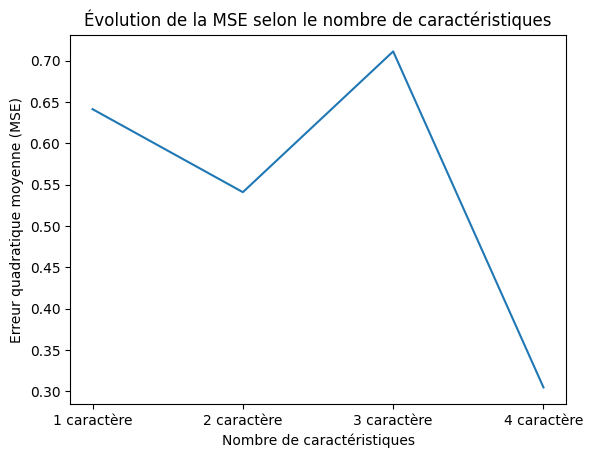

In [20]:
# Visualisation de l'évolution de l'erreur quadratique moyenne en fonction du nombre de caractéristiques
plt.plot(averageMSE_all)
plt.title("Évolution de la MSE selon le nombre de caractéristiques")
plt.xlabel("Nombre de caractéristiques")
plt.ylabel("Erreur quadratique moyenne (MSE)")
plt.xticks(ticks=np.arange(4), labels=[f"{k+1} caractère" for k in range(4)])
plt.show()

All code

Initial MSE with all features: 0.606127608864262
Moyenne des MSE pour les différents modèles avec toutes les caractéristiques :
[0.72794537 0.61703974 0.44152721 0.43473389]


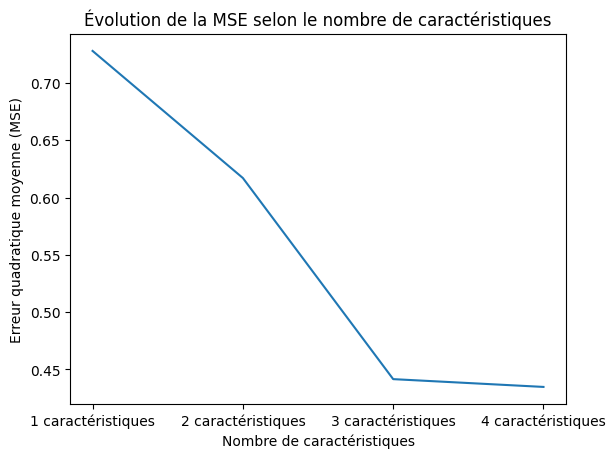

In [21]:
data = pd.read_csv('../Housing.csv')

# Étape 1 : Prétraitement des données
# Supposons que 'price' est la colonne cible et que 'area', 'bedrooms', 'bathrooms', 'stories' sont les caractéristiques
Xdata_all = df[['price', 'area', 'bedrooms', 'bathrooms', 'stories']].to_numpy()

# Étape 2 : Standardiser les données
scaler_all = StandardScaler()
X_scaled_all = scaler_all.fit_transform(Xdata_all)

# Séparer la cible des caractéristiques
y_scaled_all = X_scaled_all[:, 0]  # La première colonne 'price' est la cible
X_scaled_all = X_scaled_all[:, 1:]  # Les autres colonnes sont les caractéristiques

# Étape 3 : Séparer les données en ensembles d'entraînement et de test
x_train_all, x_test_all, y_train_all, y_test_all = train_test_split(X_scaled_all, y_scaled_all, test_size=0.3, random_state=42)

# Étape 4 : Entraîner le modèle de régression linéaire
model_all = LinearRegression()
model_all.fit(x_train_all, y_train_all)

# Étape 5 : Faire des prédictions et calculer l'erreur quadratique moyenne (MSE)
y_pred_all = model_all.predict(x_test_all)
mse_all = mean_squared_error(y_test_all, y_pred_all)

# Afficher la MSE initiale
print(f"Initial MSE with all features: {mse_all}")

# Étape 6 : Répéter l'évaluation sur 100 itérations pour calculer une MSE moyenne
num_iterations = 100
MSE_all = np.zeros((4, num_iterations))

# Boucle sur le nombre de caractéristiques k (de 1 à 4)
for k in range(4):
    for i in range(num_iterations):
        # Division des données en ensembles d'entraînement et de test
        x_train, x_test, y_train, y_test = train_test_split(X_scaled_all, y_scaled_all, test_size=1)

        # Entraînement du modèle en utilisant k+1 caractéristiques
        model = LinearRegression().fit(x_train[:, :k+1], y_train)

        # Prédiction sur l'échantillon de test
        y_pred = model.predict(x_test[:, :k+1])

        # Calcul de l'erreur quadratique moyenne
        MSE_all[k, i] = mean_squared_error(y_test, y_pred)

# Calcul de la moyenne des erreurs MSE pour chaque k
averageMSE_all = np.mean(MSE_all, axis=1)

# Affichage de la moyenne des MSE pour les différents modèles
print("Moyenne des MSE pour les différents modèles avec toutes les caractéristiques :")
print(averageMSE_all)

# Visualisation de l'évolution de l'erreur quadratique moyenne en fonction du nombre de caractéristiques
plt.plot(averageMSE_all)
plt.title("Évolution de la MSE selon le nombre de caractéristiques")
plt.xlabel("Nombre de caractéristiques")
plt.ylabel("Erreur quadratique moyenne (MSE)")
plt.xticks(ticks=np.arange(4), labels=[f"{k+1} caractéristiques" for k in range(4)])
plt.show()


##### *Question h)-* Ajouter les colonnes non numériques -> conversion en variables binaires (`OneHotEncoder` ou `pd.get_dummies()`).

In [22]:
# Importation des bibliothèques nécessaires
import pandas as pd
from sklearn.model_selection import train_test_split  # Pour diviser les données en ensembles d'entraînement et de test
from sklearn.preprocessing import StandardScaler      # Pour normaliser les données
from sklearn.linear_model import LinearRegression     # Pour la régression linéaire
from sklearn.metrics import mean_squared_error        # Pour calculer l'erreur quadratique moyenne (MSE)
from sklearn.preprocessing import OneHotEncoder       # Pour transformer les variables catégoriques en variables binaires
import numpy as np                                    # Pour les opérations sur les tableaux et matrices
import matplotlib.pyplot as plt                       # Pour afficher les graphiques

# Charger le fichier CSV dans un DataFrame
df = pd.read_csv('Housing.csv')

# Afficher les premières lignes du dataset pour inspecter la structure des données
print(df.head())

# Supposons que 'price' est la colonne cible (ce que nous voulons prédire)
# Et que 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea' sont les caractéristiques
# Les colonnes non numériques sont : 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea'

# Étape 1 : Prétraitement des données
# Transformer les colonnes catégoriques en variables binaires avec pd.get_dummies()
df_encoded = pd.get_dummies(df, columns=['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea'], drop_first=True)

# Transformer les données en un tableau numpy
Xdata_all = df_encoded[['price', 'area', 'bedrooms', 'bathrooms', 'stories', 
                        'mainroad_yes', 'guestroom_yes', 'basement_yes', 
                        'hotwaterheating_yes', 'airconditioning_yes', 'prefarea_yes']].to_numpy()

# Étape 2 : Standardiser les données
scaler_all = StandardScaler()
X_scaled_all = scaler_all.fit_transform(Xdata_all)

# Séparer la cible (colonne 'price') des caractéristiques
y_scaled_all = X_scaled_all[:, 0]  # La première colonne 'price' est la cible
X_scaled_all = X_scaled_all[:, 1:]  # Les autres colonnes sont les caractéristiques

# Étape 3 : Séparer les données en ensembles d'entraînement et de test
x_train_all, x_test_all, y_train_all, y_test_all = train_test_split(X_scaled_all, y_scaled_all, test_size=0.3, random_state=42)

# Étape 4 : Entraîner le modèle de régression linéaire
model_all = LinearRegression()
model_all.fit(x_train_all, y_train_all)

# Étape 5 : Faire des prédictions et calculer l'erreur quadratique moyenne (MSE)
y_pred_all = model_all.predict(x_test_all)

# Calcul de la MSE initiale
mse_all = mean_squared_error(y_test_all, y_pred_all)

# Afficher la MSE initiale
print(f"Initial MSE with all features including categorical variables: {mse_all}")

# Étape 6 : Répéter l'évaluation sur 100 itérations pour calculer une MSE moyenne
num_iterations = 100  # Nombre d'itérations pour l'échantillonnage aléatoire

# Initialisation d'un tableau pour stocker les erreurs MSE pour différents nombres de caractéristiques
MSE_all = np.zeros((X_scaled_all.shape[1], num_iterations))

# Boucle sur le nombre de caractéristiques k (de 1 à n où n est le nombre total de caractéristiques)
for k in range(X_scaled_all.shape[1]):
    # Boucle pour effectuer plusieurs essais avec un échantillonnage aléatoire
    for i in range(num_iterations):
        
        # Division des données en ensembles d'entraînement et de test
        x_train_all, x_test_all, y_train_all, y_test_all = train_test_split(X_scaled_all[:, :k+1], y_scaled_all, test_size=1)

        # Entraînement du modèle de régression linéaire en utilisant k+1 caractéristiques
        model_all = LinearRegression().fit(x_train_all, y_train_all)

        # Prédiction sur l'échantillon de test
        y_pred_all = model_all.predict(x_test_all[:, :k+1])

        # Calcul de l'erreur quadratique moyenne entre la prédiction et la valeur réelle
        MSE_all[k, i] = mean_squared_error(y_test_all, y_pred_all)

# Calcul de la moyenne des erreurs MSE pour chaque k
averageMSE_all = np.mean(MSE_all, axis=1)

# Affichage de la moyenne des MSE pour les différents modèles
print("Moyenne des MSE pour les différents modèles avec toutes les caractéristiques :")
print(averageMSE_all)

# Visualisation de l'évolution de l'erreur quadratique moyenne en fonction du nombre de caractéristiques
plt.plot(averageMSE_all)
plt.title("Évolution de la MSE selon le nombre de caractéristiques (incluant les variables binaires)")
plt.xlabel("Nombre de caractéristiques")
plt.ylabel("Erreur quadratique moyenne (MSE)")
plt.xticks(ticks=np.arange(X_scaled_all.shape[1]), labels=[f"{k+1}" for k in range(X_scaled_all.shape[1])])
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'Housing.csv'

### Matrice de corrélation

In [14]:
# Étape 1 : Calcul de la matrice de corrélation
# Nous calculons la corrélation entre 'price' et les autres colonnes pertinentes du DataFrame
correlation_matrix = df[['price', 'area', 'bedrooms', 'bathrooms', 'stories']].corr()

# Afficher la matrice de corrélation
print("Matrice de corrélation :")
print(correlation_matrix)

# Visualiser la matrice de corrélation sous forme de carte de chaleur (heatmap)
import seaborn as sns  # Bibliothèque pour les visualisations avancées
plt.figure(figsize=(8, 6))  # Taille de la figure
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matrice de corrélation des caractéristiques")
plt.show()


Matrice de corrélation :
              price      area  bedrooms  bathrooms   stories
price      1.000000  0.535997  0.366494   0.517545  0.420712
area       0.535997  1.000000  0.151858   0.193820  0.083996
bedrooms   0.366494  0.151858  1.000000   0.373930  0.408564
bathrooms  0.517545  0.193820  0.373930   1.000000  0.326165
stories    0.420712  0.083996  0.408564   0.326165  1.000000


ModuleNotFoundError: No module named 'seaborn'